# Python Text Analysis - Final Project

### by

## Ali Hasnain Khan Sial 

## Dataset : Rotten Tomatos Movie Reviews

### Explaing the data:

There are two datasets i,ll be working with. In the movies dataset each record represents a movie available on Rotten Tomatoes, with the URL used for the scraping, movie tile, description, genres, duration, director, actors, users' ratings, and critics' ratings.
In the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

The dataset can be directly obtained from [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?resource=download) (please click to access the link). The data was very big to be uploaded to my github, thus, you will have to directly download the data from the source aftert that update the path based on your machince to call the data. In the first part of the exercise I will be performing EDA and cleaning the data. Once I have obtained the cleaned data, I will begin working on text analysis. 

## Data Cleaning and Mungging

In [1]:
# seting working directory 
import os

os.getcwd()
os.chdir('C:\\Users\\Ali Sial\\Downloads\\Python_Tex_Analysis')

In [18]:
# importing main libraries

import pandas as pd
import numpy as np
import wordcloud

In [2]:
# importing the first dataset

critics = pd.read_csv('C:\\Users\\Ali Sial\\Downloads\\Python_Tex_Analysis\\Data\\rotten_tomatoes_critic_reviews.csv')
critics

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [7]:
#dropping columns that are not required for analysis

critics.drop(['top_critic', 'review_type', 'review_score', 'review_date'], axis = 1, inplace = True)

In [23]:
#looking for rows with missing values 

critics.isnull().sum(axis=0).sort_values(ascending=False)

rotten_tomatoes_link    0
critic_name             0
publisher_name          0
review_content          0
dtype: int64

In [24]:
# dropping rows with NA values for both reviews and critic name 
 
critics = critics.dropna(subset = ['critic_name'])
critics = critics.dropna(subset = ['review_content'])

critics

,rotten_tomatoes_link,critic_name,publisher_name,review_content
0,m/0814255,Andrew L. Urban,Urban Cinefile,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,Urban Cinefile,"Uma Thurman as Medusa, the gorgon with a coiff..."
3,m/0814255,Ben McEachen,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,Hollywood Reporter,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,Associated Press,It's more a list of ingredients than a movie-m...
...,...,...,...,...
1130008,m/zulu,Joan Didion,Vogue,A rousing reconstruction of the 1879 Battle of...
1130013,m/zulu_dawn,Ken Hanke,"Mountain Xpress (Asheville, NC)","Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,Dennis Schwartz Movie Reviews,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,Sarasota Herald-Tribune,"A simple two-act story: Prelude to war, and th..."


In [26]:
# adding the id column to the dataframe since thats missing and movie id cannot be used as the id column since it repeats itself

critics.insert(0, 'id', range(0, 0 + len(critics)))
critics

ValueError: cannot insert id, already exists

In [38]:
# importing the second data set that has the movie names 

movies = pd.read_csv('C:\\Users\\Ali Sial\\Downloads\\Python_Tex_Analysis\\Data\\rotten_tomatoes_movies.csv')
movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [39]:
# droppimg all unnecessary columns from the movies dataset

movies.drop(['movie_info', 'critics_consensus', 'authors', 'actors', 'original_release_date', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'streaming_release_date', 'runtime'], axis = 1, inplace = True)
movies

,rotten_tomatoes_link,movie_title,content_rating,genres,directors
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
1,m/0878835,Please Give,R,Comedy,Nicole Holofcener
2,m/10,10,R,"Comedy, Romance",Blake Edwards
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer
...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez
17708,m/zootopia,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush"
17709,m/zorba_the_greek,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",NaN
17710,m/zulu,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield"


In [63]:
# joinning both the data tables using rotten tomatoes link (id) to form one big data set

df = pd.merge(critics,movies,on='rotten_tomatoes_link')
df

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors
0,0,m/0814255,Andrew L. Urban,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
1,1,m/0814255,Louise Keller,Urban Cinefile,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
2,2,m/0814255,Ben McEachen,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
3,3,m/0814255,Ethan Alter,Hollywood Reporter,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
4,4,m/0814255,David Germain,Associated Press,It's more a list of ingredients than a movie-m...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus
...,...,...,...,...,...,...,...,...,...
1054092,1054193,m/zulu,Joan Didion,Vogue,A rousing reconstruction of the 1879 Battle of...,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield"
1054093,1054194,m/zulu_dawn,Ken Hanke,"Mountain Xpress (Asheville, NC)","Seen today, it's not only a startling indictme...",Zulu Dawn,PG,"Action & Adventure, Art House & International,...",Douglas Hickox
1054094,1054195,m/zulu_dawn,Dennis Schwartz,Dennis Schwartz Movie Reviews,A rousing visual spectacle that's a prequel of...,Zulu Dawn,PG,"Action & Adventure, Art House & International,...",Douglas Hickox
1054095,1054196,m/zulu_dawn,Christopher Lloyd,Sarasota Herald-Tribune,"A simple two-act story: Prelude to war, and th...",Zulu Dawn,PG,"Action & Adventure, Art House & International,...",Douglas Hickox


# Sentiment Analysis

### Using the movie reviews the first analysis I intend to perform is sentiment analysis. Once I have compunded the sentimnet for each review, I will look at the results from 4 different angles which are:

- Overall sentiment of the reviews
- sentiment based on content review ratings
- sentiment comparison of top 10 movies
- sentiment comparison of top 10 critics

In [42]:
# now moving on to perform sentiment analysis using vaderSentiment. Incase you dont have it installed already, please do so by using the command provided below
#!pip install vaderSentiment 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [44]:
# taking out the reviews column from the main dataset to perform sentiment analysis

review = df[['review_content']]
review.head()

,review_content
0,A fantasy adventure that fuses Greek mythology...
1,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Whether audiences will get behind The Lightnin...
3,What's really lacking in The Lightning Thief i...
4,It's more a list of ingredients than a movie-m...


In [45]:
type(review)

pandas.core.frame.DataFrame

In [50]:
# computing the polarity score for each review

review['polarity_score']=review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_22092/1747662846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['polarity_score']=review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])


In [53]:
review.head()

,review_content,polarity_score
0,A fantasy adventure that fuses Greek mythology...,0.7579
1,"Uma Thurman as Medusa, the gorgon with a coiff...",0.0000
2,Whether audiences will get behind The Lightnin...,0.7050
3,What's really lacking in The Lightning Thief i...,-0.5267
4,It's more a list of ingredients than a movie-m...,0.4939


In [54]:
# computing individual neutral, negative and positive sentiment scores

review['neutral'] = review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
review['negative'] = review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
review['positive'] = review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_22092/2147076141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['neutral'] = review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_22092/2147076141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['negative'] = review['review_content'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_22092/2147076141.py:3: Set

In [55]:
review.head()

,review_content,polarity_score,neutral,negative,positive
0,A fantasy adventure that fuses Greek mythology...,0.7579,0.776,0.000,0.224
1,"Uma Thurman as Medusa, the gorgon with a coiff...",0.0000,1.000,0.000,0.000
2,Whether audiences will get behind The Lightnin...,0.7050,0.733,0.078,0.189
3,What's really lacking in The Lightning Thief i...,-0.5267,0.880,0.120,0.000
4,It's more a list of ingredients than a movie-m...,0.4939,0.824,0.000,0.176


In [56]:
# computing the string determining whether the overall sentiment of that particular reviews was neutral, negative and positive

review['sentiment']=''
review.loc[review.polarity_score>0.05, 'sentiment']='Positive'
review.loc[(review.polarity_score>-0.05) & (review.polarity_score<0.05), 'sentiment']='Neutral'
review.loc[review.polarity_score<-0.05, 'sentiment']='Negative'

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_22092/3312939225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['sentiment']=''
C:\Users\Ali Sial\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [64]:
review.head()

,review_content,polarity_score,neutral,negative,positive,sentiment
0,A fantasy adventure that fuses Greek mythology...,0.7579,0.776,0.000,0.224,Positive
1,"Uma Thurman as Medusa, the gorgon with a coiff...",0.0000,1.000,0.000,0.000,Neutral
2,Whether audiences will get behind The Lightnin...,0.7050,0.733,0.078,0.189,Positive
3,What's really lacking in The Lightning Thief i...,-0.5267,0.880,0.120,0.000,Negative
4,It's more a list of ingredients than a movie-m...,0.4939,0.824,0.000,0.176,Positive


In [65]:
# adding the polarity score and sentiment value to the main dataset

df[['polarity_score', 'sentiment']]=review[['polarity_score', 'sentiment']]

In [66]:
df.head()

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
0,0,m/0814255,Andrew L. Urban,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7579,Positive
1,1,m/0814255,Louise Keller,Urban Cinefile,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.0000,Neutral
2,2,m/0814255,Ben McEachen,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7050,Positive
3,3,m/0814255,Ethan Alter,Hollywood Reporter,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,-0.5267,Negative
4,4,m/0814255,David Germain,Associated Press,It's more a list of ingredients than a movie-m...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.4939,Positive


In [67]:
# dropping rows where polarity score is zero, it is mainly because the review provided is in a forign language which in our case becomes irrelavant

df = df[df['polarity_score'] != 0]
df.head()

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
0,0,m/0814255,Andrew L. Urban,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7579,Positive
2,2,m/0814255,Ben McEachen,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7050,Positive
3,3,m/0814255,Ethan Alter,Hollywood Reporter,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,-0.5267,Negative
4,4,m/0814255,David Germain,Associated Press,It's more a list of ingredients than a movie-m...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.4939,Positive
6,6,m/0814255,Bill Goodykoontz,Arizona Republic,"Percy Jackson isn't a great movie, but it's a ...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7143,Positive


In [72]:
# dropping rows with empty sentiment score 

df = df[df['sentiment'] != '']

In [74]:
# now that we have gotten are filtered and clean dataset, i will write it in a new csv so that i dont have to perform the cleaning computing bit again 
#df.to_csv("movies_reviews_final.csv", index = False)

In [116]:
# reading the final csv file

df = pd.read_csv('C:\\Users\\Ali Sial\\Downloads\\Python_Tex_Analysis\\Data\\movies_reviews_final.csv')
df

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
0,0,m/0814255,Andrew L. Urban,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7579,Positive
1,2,m/0814255,Ben McEachen,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7050,Positive
2,3,m/0814255,Ethan Alter,Hollywood Reporter,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,-0.5267,Negative
3,4,m/0814255,David Germain,Associated Press,It's more a list of ingredients than a movie-m...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.4939,Positive
4,6,m/0814255,Bill Goodykoontz,Arizona Republic,"Percy Jackson isn't a great movie, but it's a ...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.7143,Positive
...,...,...,...,...,...,...,...,...,...,...,...
928330,1054192,m/zulu,Isabel Quigly,The Spectator,"The tension mounts, breaks, mounts, seems unbe...",Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield",-0.8481,Negative
928331,1054193,m/zulu,Joan Didion,Vogue,A rousing reconstruction of the 1879 Battle of...,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield",-0.3818,Negative
928332,1054194,m/zulu_dawn,Ken Hanke,"Mountain Xpress (Asheville, NC)","Seen today, it's not only a startling indictme...",Zulu Dawn,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,-0.0286,Neutral
928333,1054196,m/zulu_dawn,Christopher Lloyd,Sarasota Herald-Tribune,"A simple two-act story: Prelude to war, and th...",Zulu Dawn,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,-0.7018,Negative


In [118]:
df[df['content_rating']== 'R']

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
120,146,m/0878835,Justin Chang,Variety,"Like Holofcener's previous pictures, Please Gi...",Please Give,R,Comedy,Nicole Holofcener,0.7845,Positive
121,148,m/0878835,Tim Grierson,Screen International,"Keener, Peet and Hall all shine as women plagu...",Please Give,R,Comedy,Nicole Holofcener,-0.3182,Negative
122,149,m/0878835,Andrew O'Hehir,Salon.com,"An edgy, somber, beautifully written Manhattan...",Please Give,R,Comedy,Nicole Holofcener,-0.8020,Negative
123,150,m/0878835,Erik Childress,eFilmCritic.com,Holofcener always gives us more to chew on tha...,Please Give,R,Comedy,Nicole Holofcener,0.4767,Positive
124,151,m/0878835,Richard Mowe,Boxoffice Magazine,"The tone is low-key but very funny. Yet, at th...",Please Give,R,Comedy,Nicole Holofcener,0.6474,Positive
...,...,...,...,...,...,...,...,...,...,...,...
928047,1053876,m/zoot_suit,Vincent Canby,New York Times,"[Zoot Suit] is a holy mess of a movie, full of...",Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,-0.1779,Negative
928048,1053877,m/zoot_suit,Antonio Albert,El Pais (Spain),Interesting. [Full Review in Spanish],Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,0.4019,Positive
928049,1053878,m/zoot_suit,Fotogramas Staff,Fotogramas,A curious film with a hint of authenticity. [F...,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,0.3182,Positive
928050,1053879,m/zoot_suit,TV Guide Staff,TV Guide,"Valdez, who adapted his play for the screen, k...",Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,0.6486,Positive


## Overall Sentiment of Reviews

### As you see from the chart provided below that most of the reviews tend to have a postive sentiment whcih is a bit strange. After reviewing the data again, I came to the conclusion that most of the reviews are for the movies that were popular thus resulting in an overall postive sentiment.  

<AxesSubplot:xlabel='sentiment', ylabel='count'>

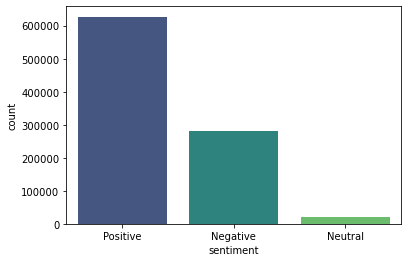

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# overall count of three sentiments we have with regards to this dataset

sns.countplot(x='sentiment', data=df, palette="viridis")

In [80]:
df.content_rating.unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

## Sentiment based on Content Rating

### Base on the chart provided below, we can see again that highest number of sentiments were postive along all the categories. Whats even more suprising is the fact that R rated movies have the most amount of postive sentiments. After having a deep look into why that might be the case, it turns out that most of the famous comdey movies have been listed as R rated and reviews given to them tend to have more postive words, thus it is possible that due that reason overall reviews tend to have more positive sentiments.

<AxesSubplot:xlabel='content_rating', ylabel='count'>

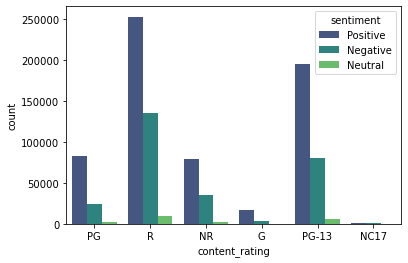

In [81]:
# lets look at how the spread of sentimnets for the various contnet rating we have. shockingly R rated movies tend to have more and more postive sentiments in the critic reviews. Overall it is obvious that we have more postive sentiments compared to negative or neutral thus the count for postive sentiments is the highest among all categories. 

sns.countplot(x='content_rating', hue="sentiment", data=df, palette="viridis")

In [84]:
# next i wanted to look at sentiments for the top 10 movies (based on number of reviews)

df.movie_title.value_counts().sort_values(ascending=False).head(10)

Star Wars: The Rise of Skywalker              912
Star Wars: The Last Jedi                      882
Solo: A Star Wars Story                       878
Rogue One: A Star Wars Story                  836
Spider-Man: Far From Home                     812
Star Wars: Episode VII - The Force Awakens    808
Ready Player One                              806
Shazam!                                       762
Robin Hood                                    733
Suicide Squad                                 714
Name: movie_title, dtype: int64

In [129]:
# making a filtered dataset to compare sentiments for the top 10 movies 

top_10_movies = ['Star Wars: The Rise of Skywalker', 'Star Wars: The Last Jedi', 'Solo: A Star Wars Story', 'Rogue One: A Star Wars Story', 'Spider-Man: Far From Home', 'Star Wars: Episode VII - The Force Awakens', 'Ready Player One', 'Shazam!', 'Robin Hood', 'Suicide Squad']
movies = df[df['movie_title'].isin(top_10_movies)]
movies

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
19469,22340,m/1017699-robin_hood,David Keyes,Cinemaphile.org,It's good for that time period from which the ...,Robin Hood,G,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,0.4588,Positive
19470,22341,m/1017699-robin_hood,Jeffrey Westhoff,"Northwest Herald (Crystal Lake, IL)",The nadir in the history of Disney animation. ...,Robin Hood,G,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,-0.4939,Negative
19471,22342,m/1017699-robin_hood,Bob Bloom,"Journal and Courier (Lafayette, IN)",Not one of Disney's better animated efforts; i...,Robin Hood,G,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,0.4404,Positive
19472,22343,m/1017699-robin_hood,Steven D. Greydanus,Decent Films Guide,As post-Sleeping Beauty Disney animated featur...,Robin Hood,G,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,0.3272,Positive
19473,22344,m/1017699-robin_hood,Vincent Canby,New York Times,"The visual style is charmingly conventional, a...",Robin Hood,G,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,0.9325,Positive
...,...,...,...,...,...,...,...,...,...,...,...
730040,829985,m/suicide_squad_2016,Murjani Rawls,Deadscreen,DC seems to be confused in what tone to choose...,Suicide Squad,PG-13,Action & Adventure,David Ayer,-0.7783,Negative
730041,829986,m/suicide_squad_2016,Damond Fudge,"KCCI (Des Moines, IA)","Once again, DC has made a film that feels less...",Suicide Squad,PG-13,Action & Adventure,David Ayer,0.8768,Positive
730042,829987,m/suicide_squad_2016,Damond Fudge,"KCCI (Des Moines, IA)","Once again, DC has made a film that feels less...",Suicide Squad,PG-13,Action & Adventure,David Ayer,0.8768,Positive
730043,829988,m/suicide_squad_2016,Richard Propes,TheIndependentCritic.com,Suicide Squad falls remarkably short.,Suicide Squad,PG-13,Action & Adventure,David Ayer,-0.6705,Negative


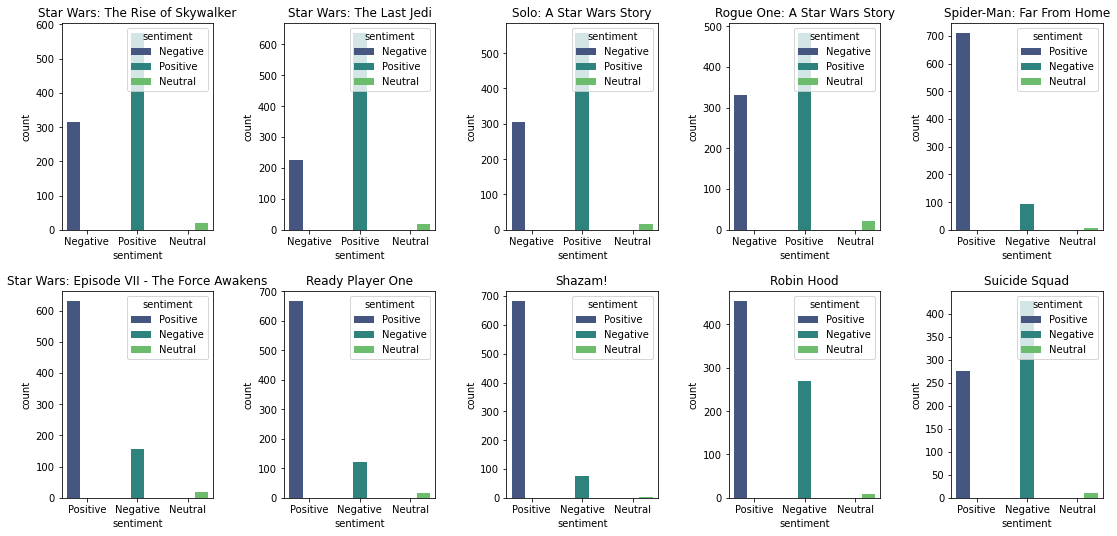

In [128]:
fig, axes = plt.subplots(2,5, figsize = (16, 8))

fig.tight_layout(pad = 4)

sns.countplot(ax=axes[0, 0], data=movies[movies['movie_title']== top_10_movies[0]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[0])
sns.countplot(ax=axes[0, 1], data=movies[movies['movie_title']== top_10_movies[1]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[1])
sns.countplot(ax=axes[0, 2], data=movies[movies['movie_title']== top_10_movies[2]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[2])
sns.countplot(ax=axes[0, 3], data=movies[movies['movie_title']== top_10_movies[3]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[3])
sns.countplot(ax=axes[0, 4], data=movies[movies['movie_title']== top_10_movies[4]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[4])
sns.countplot(ax=axes[1, 0], data=movies[movies['movie_title']== top_10_movies[5]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[5])
sns.countplot(ax=axes[1, 1], data=movies[movies['movie_title']== top_10_movies[6]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[6])
sns.countplot(ax=axes[1, 2], data=movies[movies['movie_title']== top_10_movies[7]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[7])
sns.countplot(ax=axes[1, 3], data=movies[movies['movie_title']== top_10_movies[8]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[8])
sns.countplot(ax=axes[1, 4], data=movies[movies['movie_title']== top_10_movies[9]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_movies[9])


In [35]:
# next i wanted to look at sentiments for the top 10 critics (based on number of reviews they have written)

df.critic_name.value_counts().sort_values(ascending=False).head(10)

Roger Ebert                      5782
Brian Orndorf                    5466
Jeffrey M. Anderson              5147
Dennis Schwartz                  5126
Frank Swietek                    4782
Roger Moore                      4682
Frederic and Mary Ann Brussat    4300
Rich Cline                       4219
David Nusair                     4124
James Berardinelli               4084
MaryAnn Johanson                 3772
Ken Hanke                        3720
Name: critic_name, dtype: int64

In [21]:
top_10_critic = ['Roger Ebert', 'Brian Orndorf', 'Jeffrey M. Anderson', 'Dennis Schwartz', 'Frank Swietek', 'Roger Moore', 'Frederic and Mary Ann Brussat', 'Rich Cline', 'David Nusair', 'James Berardinelli']
critics = df[df['critic_name'].isin(top_10_critic)]
critics

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
8,10,m/0814255,Roger Moore,Orlando Sentinel,"For what it is and for whom it is intended, it...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.2617,Positive
17,21,m/0814255,Jeffrey M. Anderson,Combustible Celluloid,A little bit worse than lifeless; it's clueles...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,-0.6022,Negative
33,39,m/0814255,Roger Ebert,Chicago Sun-Times,Uma Thurman demonstrates she can wear a snake-...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.5267,Positive
34,40,m/0814255,Rich Cline,Shadows on the Wall,The Greek-gods premise lets the filmmakers ind...,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,0.4404,Positive
52,61,m/0814255,Brian Orndorf,BrianOrndorf.com,"A clunky kid-sized epic, able to conjure colos...",Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,-0.5667,Negative
...,...,...,...,...,...,...,...,...,...,...,...
928168,1054014,m/zootopia,James Berardinelli,ReelViews,There's a lot here for kids to like and nearly...,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",0.3612,Positive
928177,1054024,m/zootopia,Frederic and Mary Ann Brussat,Spirituality & Practice,A spunky 3-D animated film about a bunny whose...,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",0.8591,Positive
928223,1054075,m/zootopia,Rich Cline,Contactmusic.com,The filmmakers behind Tangled and Wreck-it Ral...,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",0.8682,Positive
928316,1054174,m/zorba_the_greek,Dennis Schwartz,Dennis Schwartz Movie Reviews,Gained international acclaim for Anthony Quinn...,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",NaN,0.6124,Positive


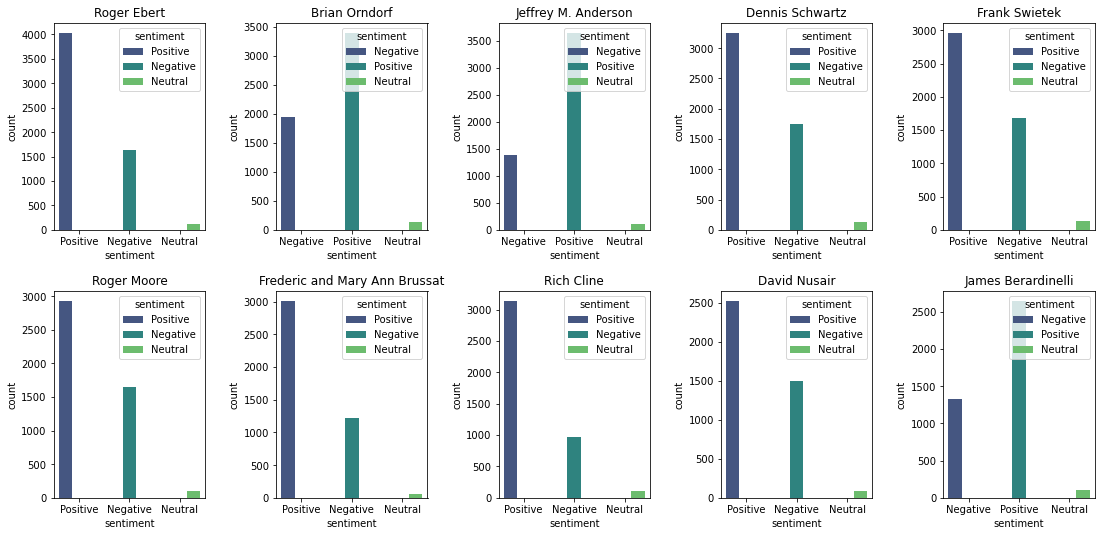

In [134]:
fig, axes = plt.subplots(2,5, figsize = (16, 8))

fig.tight_layout(pad = 4)

sns.countplot(ax=axes[0, 0], data=critics[critics['critic_name']== top_10_critic[0]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[0])
sns.countplot(ax=axes[0, 1], data=critics[critics['critic_name']== top_10_critic[1]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[1])
sns.countplot(ax=axes[0, 2], data=critics[critics['critic_name']== top_10_critic[2]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[2])
sns.countplot(ax=axes[0, 3], data=critics[critics['critic_name']== top_10_critic[3]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[3])
sns.countplot(ax=axes[0, 4], data=critics[critics['critic_name']== top_10_critic[4]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[4])
sns.countplot(ax=axes[1, 0], data=critics[critics['critic_name']== top_10_critic[5]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[5])
sns.countplot(ax=axes[1, 1], data=critics[critics['critic_name']== top_10_critic[6]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[6])
sns.countplot(ax=axes[1, 2], data=critics[critics['critic_name']== top_10_critic[7]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[7])
sns.countplot(ax=axes[1, 3], data=critics[critics['critic_name']== top_10_critic[8]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[8])
sns.countplot(ax=axes[1, 4], data=critics[critics['critic_name']== top_10_critic[9]], x='sentiment', palette = "viridis", 
                 hue="sentiment").title.set_text(top_10_critic[9])

# Text Analysis

### In this section, I plan to analyse the most number of words used in the reviews given to the top 3 movies. After I have extrated the words from the data, I will create a wordcloud for these movies. The top 3 movies are based on number of reviews and in our case all the top 3 movies are star wars movies which make the comparison easier for us. 

In [5]:
# creating a seperte dataset from the original dataset to work on  for this section 

top_3_movies = ['Star Wars: The Rise of Skywalker', 'Star Wars: The Last Jedi', 'Solo: A Star Wars Story']

reviews = df[df['movie_title'].isin(top_3_movies)]
reviews.head()

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
679452,772536,m/solo_a_star_wars_story,Julian Roman,MovieWeb,"Solo is a fun ride for sure, but it feels too ...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.4767,Negative
679453,772537,m/solo_a_star_wars_story,Robbie Collin,Daily Telegraph (UK),"Solo, the latest entry in the Lucasfilm franch...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.5574,Negative
679454,772538,m/solo_a_star_wars_story,Greg Maki,"Star-Democrat (Easton, MD)",It's no minor accomplishment that the movie is...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.3206,Positive
679455,772539,m/solo_a_star_wars_story,Chris Evangelista,Slashfilm,Solo is the first Star Wars film in recent mem...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.2732,Negative
679456,772540,m/solo_a_star_wars_story,Bob Mondello,NPR,"Things do feel shaky at first, but there's spu...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.1154,Negative


In [6]:
# reviewing each review

for index,text in enumerate(reviews['review_content'][0:928333]):
    print('Review %d: \n'%(index+1), text)

Review 1: 
 Solo is a fun ride for sure, but it feels too commercial. It is the least epic installment of the Star Wars franchise.
Review 2: 
 Solo, the latest entry in the Lucasfilm franchise, brings Star Wars back to earth with a Millennium Falcon-rattling bump.
Review 3: 
 It's no minor accomplishment that the movie is making its targeted May 25 release date and borderline miraculous that it isn't a total disaster.
Review 4: 
 Solo is the first Star Wars film in recent memory that feels like it's selling something.
Review 5: 
 Things do feel shaky at first, but there's spunk to [Alden] Ehrenreich's delivery and, once he settles in, a twinkle in his eye.
Review 6: 
 Ehrenreich hasn't failed Solo: A Star Wars Story. The truth, I daresay, is exactly the opposite.
Review 7: 
 No doubt Harrison Ford's Han Solo would casually dismiss this adequately fun origin story with a wink and a wry smile.
Review 8: 
 It's got a couple of gasps, a lot of action and a built-in Star Wars audience, pret

Review 713: 
 The biggest problem of Solo is not its being a mishmash of repeated narratives. It is its refusal to be anything more than a redundant piece in the puzzle.
Review 714: 
 The biggest problem of Solo is not its being a mishmash of repeated narratives. It is its refusal to be anything more than a redundant piece in the puzzle.
Review 715: 
 What frustrates me is that it seems the original directors were trying to build an element of unpredictability into pre-manufactured franchises. What we have is the heartwarming Han as our connection to Star Wars grows a little dimmer.
Review 716: 
 What frustrates me is that it seems the original directors were trying to build an element of unpredictability into pre-manufactured franchises. What we have is the heartwarming Han as our connection to Star Wars grows a little dimmer.
Review 717: 
 Honestly, all the big draws to the film were the biggest letdowns of it for me.
Review 718: 
 Honestly, all the big draws to the film were the big

 Rian Johnson has made a Star Wars movie that features so many great additions to canon and mythological intrigue that will have fans buzzing for years.
Review 1224: 
 The perfectly paced new entry to our galaxy far, far away features so many new Star Wars moments to love...a journey full of classic hallmarks and new additions that maintains a balance of lighthearted fun, intense action and deep emotion.
Review 1225: 
 The Last Jedi is everything a Star Wars film should be, and so much more. Johnson weaves an emotionally rewarding tale while balancing all the essential sci-fi action expected.
Review 1226: 
 For Star Wars aficionados, this entry is one of the most galvanizing, from beginning to end. What an Odyssey.
Review 1227: 
 What's most thrilling about The Last Jedi is Johnson's seamless blending of old and new Star Wars lore.
Review 1228: 
 Star Wars fans old and new are guaranteed to have an absolute blast.
Review 1229: 
 The Last Jedi suffers from occasional inconsistencies in 

Review 1973: 
 OK, the final episode isn't perfect. You'll nitpick it forever with your friends. But that's the point. Star Wars isn't a movie, it's family. We're that close to it. And the in-fighting about what it does right and wrong is as crucial as the love.
Review 1974: 
 "The Rise of Skywalker" is one last look back, and while not triumphant, it is a satisfying end of an era.
Review 1975: 
 As a conclusion to the trilogy, it is undeniably messy and often frustrating, but it has been made with skill and on some basic level, it brings the storyline to a reasonably satisfying ending.
Review 1976: 
 [A] vast, convoluted, sometimes cluttered, intermittently thrilling and thoroughly entertaining production that brings the Skywalker trilogy to a heroic close.
Review 1977: 
 The Rise Of Skywalker is a mostly satisfying spectacle -- it's fun, entertaining, visually dazzling and, yes, emotional in parts, too. But as the grand finale of the Skywalker Saga, it falls somewhat short of the mar

In [7]:
# creating a english dictionary of contractions 

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [8]:
# Regular Expression for finding contractions:

import re

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))


# Function for expanding contractions:
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [9]:
# Expanding Contractions in the review texts:
reviews['text_withNo_Contractions'] = reviews['review_content'].apply(lambda x: expand_contractions(x))
reviews[['review_content','text_withNo_Contractions']].head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/4279054210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['text_withNo_Contractions'] = reviews['review_content'].apply(lambda x: expand_contractions(x))


,review_content,text_withNo_Contractions
679452,"Solo is a fun ride for sure, but it feels too ...","Solo is a fun ride for sure, but it feels too ..."
679453,"Solo, the latest entry in the Lucasfilm franch...","Solo, the latest entry in the Lucasfilm franch..."
679454,It's no minor accomplishment that the movie is...,It is no minor accomplishment that the movie i...
679455,Solo is the first Star Wars film in recent mem...,Solo is the first Star Wars film in recent mem...
679456,"Things do feel shaky at first, but there's spu...","Things do feel shaky at first, but there is sp..."


In [10]:
# changing all text to lower case

reviews['lower_case'] =reviews['text_withNo_Contractions'].apply(lambda x: x.lower())
reviews[['review_content', 'lower_case']].head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/2523622119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['lower_case'] =reviews['text_withNo_Contractions'].apply(lambda x: x.lower())


,review_content,lower_case
679452,"Solo is a fun ride for sure, but it feels too ...","solo is a fun ride for sure, but it feels too ..."
679453,"Solo, the latest entry in the Lucasfilm franch...","solo, the latest entry in the lucasfilm franch..."
679454,It's no minor accomplishment that the movie is...,it is no minor accomplishment that the movie i...
679455,Solo is the first Star Wars film in recent mem...,solo is the first star wars film in recent mem...
679456,"Things do feel shaky at first, but there's spu...","things do feel shaky at first, but there is sp..."


In [11]:
# Here, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions

reviews['text_with_no_digits'] = reviews['lower_case'].apply(lambda x: re.sub('\w*\d\w*','', x))
reviews[['review_content', 'text_with_no_digits']].head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/4052919622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['text_with_no_digits'] = reviews['lower_case'].apply(lambda x: re.sub('\w*\d\w*','', x))


,review_content,text_with_no_digits
679452,"Solo is a fun ride for sure, but it feels too ...","solo is a fun ride for sure, but it feels too ..."
679453,"Solo, the latest entry in the Lucasfilm franch...","solo, the latest entry in the lucasfilm franch..."
679454,It's no minor accomplishment that the movie is...,it is no minor accomplishment that the movie i...
679455,Solo is the first Star Wars film in recent mem...,solo is the first star wars film in recent mem...
679456,"Things do feel shaky at first, but there's spu...","things do feel shaky at first, but there is sp..."


In [12]:
# removing punctuations from the text

import string 

reviews['Text_withNo_punct'] = reviews['text_with_no_digits'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
reviews[['review_content', 'Text_withNo_punct']].head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/157902060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Text_withNo_punct'] = reviews['text_with_no_digits'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


,review_content,Text_withNo_punct
679452,"Solo is a fun ride for sure, but it feels too ...",solo is a fun ride for sure but it feels too c...
679453,"Solo, the latest entry in the Lucasfilm franch...",solo the latest entry in the lucasfilm franchi...
679454,It's no minor accomplishment that the movie is...,it is no minor accomplishment that the movie i...
679455,Solo is the first Star Wars film in recent mem...,solo is the first star wars film in recent mem...
679456,"Things do feel shaky at first, but there's spu...",things do feel shaky at first but there is spu...


In [13]:
# removing extra spaces 

reviews['Text_withNo_punct'] = reviews['Text_withNo_punct'].apply(lambda x: re.sub(' +', ' ',x))
reviews.head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/92373722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Text_withNo_punct'] = reviews['Text_withNo_punct'].apply(lambda x: re.sub(' +', ' ',x))


,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment,text_withNo_Contractions,lower_case,text_with_no_digits,Text_withNo_punct
679452,772536,m/solo_a_star_wars_story,Julian Roman,MovieWeb,"Solo is a fun ride for sure, but it feels too ...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.4767,Negative,"Solo is a fun ride for sure, but it feels too ...","solo is a fun ride for sure, but it feels too ...","solo is a fun ride for sure, but it feels too ...",solo is a fun ride for sure but it feels too c...
679453,772537,m/solo_a_star_wars_story,Robbie Collin,Daily Telegraph (UK),"Solo, the latest entry in the Lucasfilm franch...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.5574,Negative,"Solo, the latest entry in the Lucasfilm franch...","solo, the latest entry in the lucasfilm franch...","solo, the latest entry in the lucasfilm franch...",solo the latest entry in the lucasfilm franchi...
679454,772538,m/solo_a_star_wars_story,Greg Maki,"Star-Democrat (Easton, MD)",It's no minor accomplishment that the movie is...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.3206,Positive,It is no minor accomplishment that the movie i...,it is no minor accomplishment that the movie i...,it is no minor accomplishment that the movie i...,it is no minor accomplishment that the movie i...
679455,772539,m/solo_a_star_wars_story,Chris Evangelista,Slashfilm,Solo is the first Star Wars film in recent mem...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.2732,Negative,Solo is the first Star Wars film in recent mem...,solo is the first star wars film in recent mem...,solo is the first star wars film in recent mem...,solo is the first star wars film in recent mem...
679456,772540,m/solo_a_star_wars_story,Bob Mondello,NPR,"Things do feel shaky at first, but there's spu...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.1154,Negative,"Things do feel shaky at first, but there is sp...","things do feel shaky at first, but there is sp...","things do feel shaky at first, but there is sp...",things do feel shaky at first but there is spu...


In [14]:
# removing stop word from the text using spacy 

import nltk

from nltk.corpus import stopwords

stop = stopwords.words('english')

reviews['without_stop_words'] = reviews['Text_withNo_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

reviews[['review_content','without_stop_words']].head()

C:\Users\ALISIA~1\AppData\Local\Temp/ipykernel_6092/1410459329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['without_stop_words'] = reviews['Text_withNo_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


,review_content,without_stop_words
679452,"Solo is a fun ride for sure, but it feels too ...",solo fun ride sure feels commercial least epic...
679453,"Solo, the latest entry in the Lucasfilm franch...",solo latest entry lucasfilm franchise brings s...
679454,It's no minor accomplishment that the movie is...,minor accomplishment movie making targeted may...
679455,Solo is the first Star Wars film in recent mem...,solo first star wars film recent memory feels ...
679456,"Things do feel shaky at first, but there's spu...",things feel shaky first spunk alden ehrenreich...


In [15]:
# groupping the reviews by movie titles

reviews_grouped = reviews[['movie_title', 'without_stop_words']].groupby(by='movie_title').agg(lambda x: ' '.join(x))
reviews_grouped

,without_stop_words
movie_title,
Solo: A Star Wars Story,solo fun ride sure feels commercial least epic...
Star Wars: The Last Jedi,rian johnson achieves one else since empire st...
Star Wars: The Rise of Skywalker,rise skywalker unfortunately becomes forgettab...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')


data = cv.fit_transform(reviews_grouped['without_stop_words'])
reviews_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
reviews_dtm.index = reviews_grouped.index
reviews_dtm.head()

,abandoning,abandons,ability,abjectly,able,aborted,abound,abrams,abramsedwardsjohnson,abrupt,...,youve,zany,zesty,zigzagging,zilliondollar,zing,zippy,zips,zone,ça
movie_title,,,,,,,,,,,,,,,,,,,,,
Solo: A Star Wars Story,0,2,0,0,2,0,0,0,2,2,...,0,2,2,0,0,0,6,2,0,2
Star Wars: The Last Jedi,0,0,6,0,8,0,2,20,0,0,...,0,0,0,2,0,0,0,0,2,0
Star Wars: The Rise of Skywalker,2,0,0,2,6,2,0,136,0,0,...,2,0,0,0,2,2,0,0,0,0


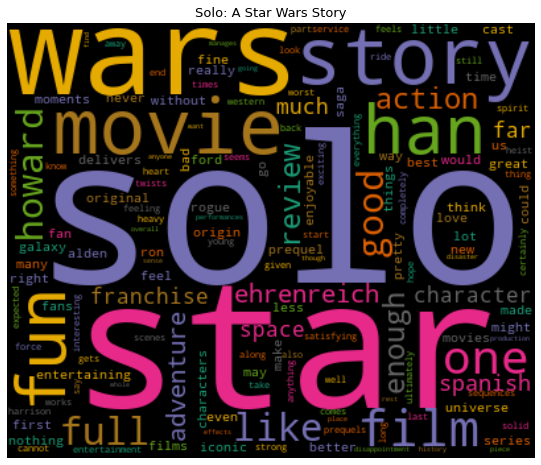

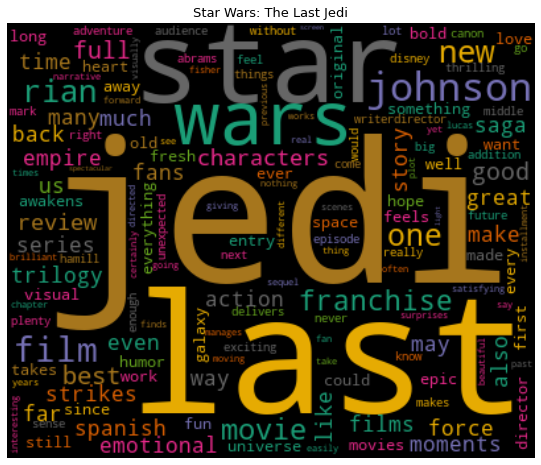

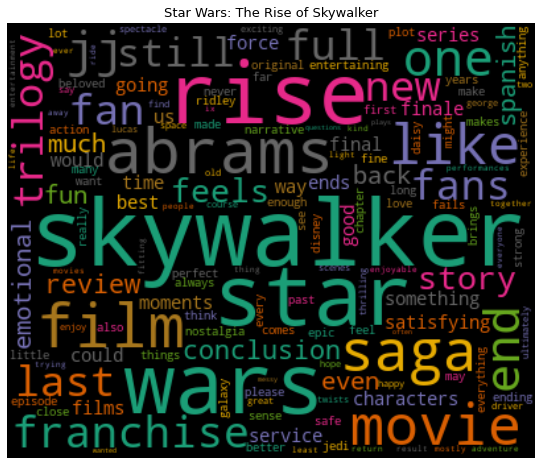

In [19]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
reviews_dtm=reviews_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(reviews_dtm.columns):
  generate_wordcloud(reviews_dtm[product].sort_values(ascending=False),product)

### As you can see the words represented in the word cloud do tell us a bit about the overall reviews given to each of those movies. I do understand that the most used words are for the movie name itself and I could have decided to drop them, but since it makes it easier for the viewer to understand which wordcloud belongs to which movie, thus I kept it as is. For the part how effective the wordcloud is taking the example of the 3rd wordcloud, it appears the type of words shown to some extent share the sentiment of the viewers, as the movie was considered a bit fun and satistying. This can also be confirmed from the sentiment anaylsis performed in the previous section, which did conclude this movie having a lot of postive reveiws. Overall, I would say the wordcloud does represent the sentiment of the critic and provides us with a basic idea how the movie was precieved by the audience.   

# Text Similarity 

### In this section I would like to the uncover the cosine similarity between the reviews written by top 8 critics for the movie with the most reviews. I basically want to see how similar is the tone of voice used by those critics when writing a review and also what kind of words do they tend to use more often. Again the base for deciding the top 8 critics is based on the number of reviews they have written. 

In [42]:
# filtering the data for top 8 crictics
top_movie_critics = ['Roger Ebert', 'Brian Orndorf', 'Jeffrey M. Anderson', 'Ken Hank', 'Frank Swietek', 'Roger Moore', 'MaryAnn Johanson', 'Rich Cline', 'David Nusair', 'James Berardinelli']

critics_sim = df[df['critic_name'].isin(top_movie_critics)]

In [43]:
# filtering the data for the movie with most reviews : Solo: A Star Wars Story

critics_sim = critics_sim[critics_sim['movie_title'] == 'Solo: A Star Wars Story']
critics_sim = critics_sim.drop_duplicates(subset = ['critic_name'])
critics_sim

,id,rotten_tomatoes_link,critic_name,publisher_name,review_content,movie_title,content_rating,genres,directors,polarity_score,sentiment
679507,772595,m/solo_a_star_wars_story,Brian Orndorf,Blu-ray.com,"A few quibbles are triggered along the way, bu...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.9366,Positive
679707,772816,m/solo_a_star_wars_story,Roger Moore,Movie Nation,"At times, ""adequate,"" save for the lead, who i...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.6249,Positive
679726,772836,m/solo_a_star_wars_story,Frank Swietek,One Guy's Opinion,A thoroughly reliable addition to the 'Star Wa...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.4404,Negative
679742,772852,m/solo_a_star_wars_story,MaryAnn Johanson,Flick Filosopher,A Star Wars-flavored juice drink* of a movie (...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.6386,Negative
679744,772854,m/solo_a_star_wars_story,James Berardinelli,ReelViews,Solo: a movie no one was clamoring for that ha...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,-0.2960,Negative
679776,772888,m/solo_a_star_wars_story,Jeffrey M. Anderson,Combustible Celluloid,"Solo: A Star Wars Story is a swift breeze, che...",Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.1356,Positive
679916,773042,m/solo_a_star_wars_story,Rich Cline,Shadows on the Wall,Even if most of the plot's twists and turns ar...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.1027,Positive
680045,773185,m/solo_a_star_wars_story,David Nusair,Reel Film Reviews,Filmmaker Ron Howard delivers a narrative that...,Solo: A Star Wars Story,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ron Howard,0.3182,Positive


In [44]:
# removing columns that are not required

critics_sim.drop(['rotten_tomatoes_link', 'publisher_name', 'movie_title', 'content_rating', 'genres', 'directors','polarity_score', 'sentiment'], axis = 1, inplace = True)
critics_sim

,id,critic_name,review_content
679507,772595,Brian Orndorf,"A few quibbles are triggered along the way, bu..."
679707,772816,Roger Moore,"At times, ""adequate,"" save for the lead, who i..."
679726,772836,Frank Swietek,A thoroughly reliable addition to the 'Star Wa...
679742,772852,MaryAnn Johanson,A Star Wars-flavored juice drink* of a movie (...
679744,772854,James Berardinelli,Solo: a movie no one was clamoring for that ha...
679776,772888,Jeffrey M. Anderson,"Solo: A Star Wars Story is a swift breeze, che..."
679916,773042,Rich Cline,Even if most of the plot's twists and turns ar...
680045,773185,David Nusair,Filmmaker Ron Howard delivers a narrative that...


In [55]:
# just in case importing/calling the required libraries

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [56]:
import string
string.punctuation
lemmatizer = WordNetLemmatizer()

In [57]:
# creating a function to clean the text for analysis

def text_preprocesser(text):
    text= re.sub(r'\W',' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [word for word in tokens if len(word)>=3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [58]:
# checking if the function works 

text_preprocesser(critics_sim['review_content'].iat[0])

'quibble triggered along way adventure remains exciting performance satisfy immensely giving side mission real charisma star war style hustle'

In [59]:
# importing CountVectorizer and setting it up

from sklearn.feature_extraction.text import CountVectorizer

Count_vectorizer = CountVectorizer(preprocessor=text_preprocesser)

In [61]:
cv = Count_vectorizer.fit_transform(critics_sim['review_content'])

In [63]:
reviews_cv = pd.DataFrame(cv.toarray().transpose(), index = Count_vectorizer.get_feature_names())

In [64]:
# dataframe indicating words used by either of the 8 critics

reviews_cv

,0,1,2,3,4,5,6,7
addition,0,0,1,0,0,0,0,0
adequate,0,1,0,0,0,0,0,0
adventure,1,0,0,0,0,0,0,0
along,1,0,0,0,0,0,1,0
already,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
two,0,0,1,0,0,0,0,0
war,1,0,1,1,0,1,0,0
watch,0,0,0,0,0,0,1,0
way,1,0,0,0,0,0,0,0


In [67]:
# renaming the columns so its easy to know which critic

reviews_cv.rename(columns={0: 'Brian Orndorf', 1:'Roger Moore', 2 : 'Frank Swietek', 3 : 'MaryAnn Johanson', 4 : 'James Berardinelli', 5 : 'Jeffrey M. Anderson', 6 : 'Rich Cline', 7 : 'David Nusair'},inplace=True)

In [68]:
reviews_cv

,Brian Orndorf,Roger Moore,Frank Swietek,MaryAnn Johanson,James Berardinelli,Jeffrey M. Anderson,Rich Cline,David Nusair
addition,0,0,1,0,0,0,0,0
adequate,0,1,0,0,0,0,0,0
adventure,1,0,0,0,0,0,0,0
along,1,0,0,0,0,0,1,0
already,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
two,0,0,1,0,0,0,0,0
war,1,0,1,1,0,1,0,0
watch,0,0,0,0,0,0,1,0
way,1,0,0,0,0,0,0,0


In [69]:
# setting up tfidf vectoriZer

tfidf_vectorizer = TfidfVectorizer(preprocessor=text_preprocesser )

In [70]:
tfidf = tfidf_vectorizer.fit_transform(critics_sim['review_content'])

In [71]:
reviews_tfidf= pd.DataFrame(tfidf.toarray().transpose(), index=tfidf_vectorizer.get_feature_names())

In [73]:
reviews_tfidf.rename(columns={0: 'Brian Orndorf', 1:'Roger Moore', 2 : 'Frank Swietek', 3 : 'MaryAnn Johanson', 4 : 'James Berardinelli', 5 : 'Jeffrey M. Anderson', 6 : 'Rich Cline', 7 : 'David Nusair'},inplace=True)
reviews_tfidf

,Brian Orndorf,Roger Moore,Frank Swietek,MaryAnn Johanson,James Berardinelli,Jeffrey M. Anderson,Rich Cline,David Nusair
addition,0.000000,0.000000,0.264193,0.000000,0.000000,0.000000,0.000000,0.0
adequate,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
adventure,0.243171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
along,0.203797,0.000000,0.000000,0.000000,0.000000,0.000000,0.220817,0.0
already,0.000000,0.000000,0.000000,0.216906,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
two,0.000000,0.000000,0.264193,0.000000,0.000000,0.000000,0.000000,0.0
war,0.154190,0.000000,0.167519,0.137536,0.000000,0.200219,0.000000,0.0
watch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263480,0.0
way,0.243171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [74]:
# importing library for cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

In [84]:
for i in range(1, 9):
    globals()["txt" + str(i)] =reviews_tfidf[reviews_tfidf.columns[i-1]].values.reshape(1, -1)  

In [83]:
# checking if cosine similarity is working

print("Similarity Brian Orndorf and Roger Moore:", cosine_similarity(txt1, txt2))
print("Similarity Brian Orndorf and Frank Swietek:", cosine_similarity(txt1, txt3))

Similarity Brian Orndorf and Roger Moore: [[0.]]
Similarity Brian Orndorf and Frank Swietek: [[0.05165966]]
Similarity Brian Orndorf and MaryAnn Johanson: [[0.11650706]]
Similarity Brian Orndorf and James Berardinelli: [[0.]]
Similarity Brian Orndorf and James Berardinelli: [[0.]]
Similarity Brian Orndorf and Jeffrey M. Anderson: [[0.06174353]]
Similarity Brian Orndorf and Rich Cline: [[0.04500164]]
Similarity Brian Orndorf and David Nusair: [[0.]]


In [113]:
# creating a dataframe for easy readability of the cosine matrix

consine_matrix = pd.DataFrame({"Brian Orndorf":[cosine_similarity(txt1, txt1), cosine_similarity(txt1, txt2), cosine_similarity(txt1, txt3), cosine_similarity(txt1, txt4), cosine_similarity(txt1, txt5), cosine_similarity(txt1, txt6), cosine_similarity(txt1, txt7), cosine_similarity(txt1, txt8)],
                 "Roger Moore":[cosine_similarity(txt2, txt1), cosine_similarity(txt2, txt2), cosine_similarity(txt2, txt3), cosine_similarity(txt2, txt4), cosine_similarity(txt2, txt5), cosine_similarity(txt2, txt6), cosine_similarity(txt2, txt7), cosine_similarity(txt2, txt8)],
                  "Frank Swietek" :[cosine_similarity(txt3, txt1), cosine_similarity(txt3, txt2), cosine_similarity(txt3, txt3), cosine_similarity(txt3, txt4), cosine_similarity(txt3, txt5), cosine_similarity(txt3, txt6), cosine_similarity(txt3, txt7), cosine_similarity(txt3, txt8)],
                              "MaryAnn Johanson" :[cosine_similarity(txt4, txt1), cosine_similarity(txt4, txt2), cosine_similarity(txt4, txt2), cosine_similarity(txt4, txt4), cosine_similarity(txt4, txt5), cosine_similarity(txt4, txt6), cosine_similarity(txt4, txt7), cosine_similarity(txt4, txt8)],
                              "James Berardinelli" :[cosine_similarity(txt5, txt1), cosine_similarity(txt5, txt2), cosine_similarity(txt5, txt3), cosine_similarity(txt5, txt4), cosine_similarity(txt5, txt5), cosine_similarity(txt5, txt6), cosine_similarity(txt5, txt7), cosine_similarity(txt5, txt8)],
                              "Jeffrey M. Anderson":[cosine_similarity(txt6, txt1), cosine_similarity(txt6, txt2), cosine_similarity(txt6, txt3), cosine_similarity(txt6, txt4), cosine_similarity(txt6, txt5), cosine_similarity(txt6, txt6), cosine_similarity(txt6, txt7), cosine_similarity(txt6, txt8)],
                              "Rich Cline":[cosine_similarity(txt7, txt1), cosine_similarity(txt7, txt2), cosine_similarity(txt7, txt3), cosine_similarity(txt7, txt4), cosine_similarity(txt7, txt5), cosine_similarity(txt7, txt6), cosine_similarity(txt7, txt7), cosine_similarity(txt7, txt8)],
                              "David Nusair":[cosine_similarity(txt8, txt1), cosine_similarity(txt8, txt2),cosine_similarity(txt8, txt3), cosine_similarity(txt8, txt4), cosine_similarity(txt8, txt5), cosine_similarity(txt8, txt6), cosine_similarity(txt8, txt7), cosine_similarity(txt8, txt8)]})

In [114]:
# readjusting the index

consine_matrix.index = ['Brian Orndorf', 'Roger Moore', 'Frank Swietek', 'MaryAnn Johanson', 'James Berardinelli','Jeffrey M. Anderson', 'Rich Cline','David Nusair']

In [115]:
# final dataframe for cosine similarity

consine_matrix

,Brian Orndorf,Roger Moore,Frank Swietek,MaryAnn Johanson,James Berardinelli,Jeffrey M. Anderson,Rich Cline,David Nusair
Brian Orndorf,[[0.9999999999999999]],[[0.0]],[[0.05165966200444433]],[[0.11650706419978837]],[[0.0]],[[0.0617435301799072]],[[0.04500163946149238]],[[0.0]]
Roger Moore,[[0.0]],[[1.0000000000000002]],[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[0.0]]
Frank Swietek,[[0.05165966200444433]],[[0.0]],[[1.0000000000000002]],[[0.0]],[[0.0544029976036493]],[[0.06708102431433895]],[[0.0]],[[0.0]]
MaryAnn Johanson,[[0.11650706419978837]],[[0.0]],[[0.07605058554343716]],[[1.0000000000000004]],[[0.08933116414488895]],[[0.09089551579522254]],[[0.0]],[[0.0]]
James Berardinelli,[[0.0]],[[0.0]],[[0.0544029976036493]],[[0.08933116414488895]],[[1.0000000000000002]],[[0.15234436871508283]],[[0.07286357422175478]],[[0.0]]
Jeffrey M. Anderson,[[0.0617435301799072]],[[0.0]],[[0.06708102431433895]],[[0.09089551579522254]],[[0.15234436871508283]],[[1.0000000000000002]],[[0.0]],[[0.0]]
Rich Cline,[[0.04500163946149238]],[[0.0]],[[0.0]],[[0.0]],[[0.07286357422175478]],[[0.0]],[[1.0000000000000002]],[[0.0]]
David Nusair,[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[0.0]],[[1.0]]


### Based on the similarity analysis performed above, it appears that, there is very minute similarity between the top 8 critics who have written a review on  Solo: A Star Wars Story. The highest cosine similarity exists between James Berardinelli and Jeffrey M. Anderson i.e. 0.1523. To confirm if the results for this consine similarity analysis are reliable, I researched on these two critics and it turns out that both of them are among the top registered critics of at Rotton Tomatos. Superisingly most of the scores/ratings given by both these critics tend to similar. Also I read few of there reviews for other movies as well and it turns out they do have a bit of similarity in the tone voice. The analyis performed above to uncover this pattern of similarity is a very basic one, even though it does give us some insights but in order to completely understand the association between critics, we will need to perform this analysis over and over again on reviews provided on other movies to have a deep understanding of what is going on. But overall this analysis provides us with a decent starting point and a reliable direction for future analysis. 

# Conclusion

### Upon completing the analysis, I believe we do have a basic understanding of the overall sentiment the movies reviews have within this dataset. I agree the dataset appears to be tempered or a bit imbalance or compromised due to more positive sentiments and to have a more concerete results quality of data can be improved. Also what could have been done differently to improve my results with the given data, I could have choosen to filter the reviews that have less than 15 words. This would have helped in terms of having a dataset which has more thoughtful and crediable reveiws. Also I could have tried to translate all the reviews provided in forign language to english rather than dropping them from the main dataset.